<a href="https://colab.research.google.com/github/RAJAS-KAR/Akaike_Internship_Assignment/blob/main/0001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import required  library

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
%pip install pandas pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Read the file

In [87]:
df = pd.read_parquet("/content/train.parquet", engine="pyarrow")

In [88]:
df.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [79]:
df.shape

(3220868, 3)

In [34]:
df2= pd.read_parquet("/content/test.parquet", engine="pyarrow")

In [35]:
df2.head()

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0


checking null values

In [90]:
df.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [89]:
df = df.drop_duplicates()

In [82]:
df.shape

(3185297, 3)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3185297 entries, 0 to 29080911
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Patient-Uid  object        
 1   Date         datetime64[ns]
 2   Incident     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 97.2+ MB


Enconding

In [91]:
df['Incident'] = df['Incident'].apply(lambda x: 1 if x == 'TARGET DRUG' else 0)
df

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,0
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,0
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,0
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,0
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,0
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,0
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,0


Covert to date into datetime

In [61]:
from datetime import datetime

In [62]:
df['Date'] = pd.to_datetime(df['Date'])

In [63]:
df.Date.dtype

dtype('<M8[ns]')

In [64]:
df .Incident.value_counts()

DRUG_TYPE_6          549616
DRUG_TYPE_1          484565
PRIMARY_DIAGNOSIS    424879
DRUG_TYPE_0          298881
DRUG_TYPE_2          256203
DRUG_TYPE_7          251239
DRUG_TYPE_8          158706
DRUG_TYPE_3          126615
TEST_TYPE_1           96810
TARGET DRUG           67218
DRUG_TYPE_9           66894
DRUG_TYPE_5           55940
SYMPTOM_TYPE_0        46078
DRUG_TYPE_11          45419
SYMPTOM_TYPE_6        32066
TEST_TYPE_0           27570
SYMPTOM_TYPE_7        22019
DRUG_TYPE_10          20911
DRUG_TYPE_14          17306
DRUG_TYPE_13          12321
DRUG_TYPE_12           9540
SYMPTOM_TYPE_14        8927
SYMPTOM_TYPE_1         8608
SYMPTOM_TYPE_2         8168
TEST_TYPE_3            8115
SYMPTOM_TYPE_5         7583
SYMPTOM_TYPE_8         7430
TEST_TYPE_2            7021
SYMPTOM_TYPE_15        6295
SYMPTOM_TYPE_10        6005
SYMPTOM_TYPE_29        5910
SYMPTOM_TYPE_16        4940
DRUG_TYPE_15           4906
SYMPTOM_TYPE_9         4885
DRUG_TYPE_4            4566
SYMPTOM_TYPE_4      

EDA-  To understand the data

In [65]:
target_counts = df['Incident'].value_counts()

<Axes: title={'center': 'targetcounts'}>

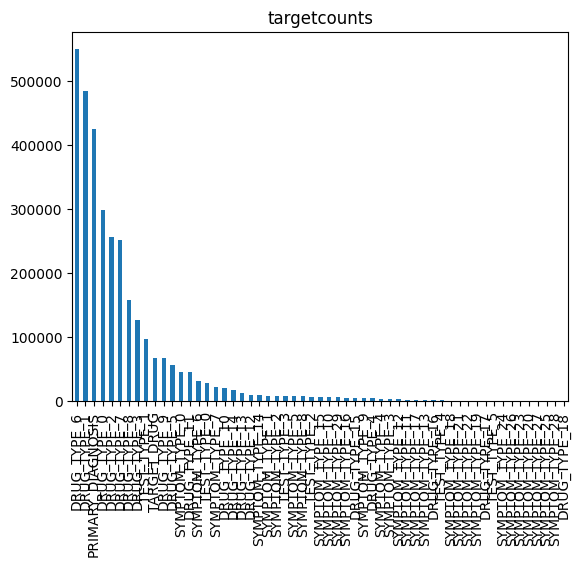

In [66]:
target_counts.plot(kind = 'bar', title = 'targetcounts')

In [72]:
df['Incident'] = df['Incident'].apply(lambda x: 1 if x == 'TARGET DRUG' else 0)
df

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,0
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,0
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,0
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,0
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,0
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,0
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,0


In [92]:
df ['Incident'].value_counts()

0    3118079
1      67218
Name: Incident, dtype: int64

In [93]:
df.Incident.unique()

array([0, 1])

Text(0.5, 1.0, 'Distribution of Incidents')

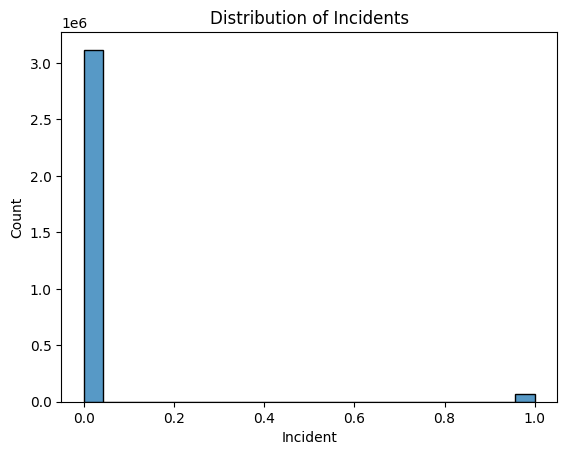

In [97]:
sns.histplot(data =df, x ='Incident')
plt.title('Distribution of Incidents')

<Axes: ylabel='Date'>

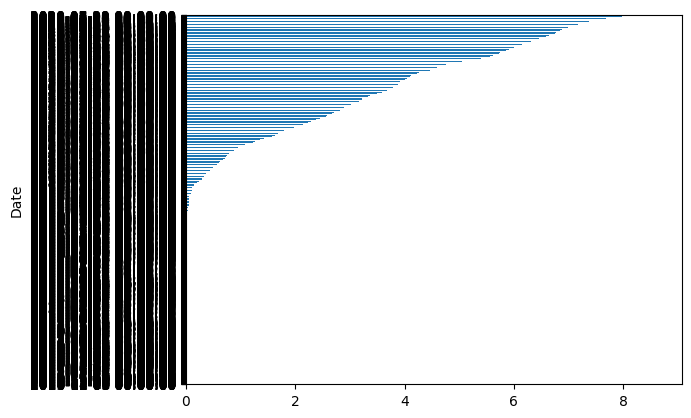

In [102]:
(df.groupby('Date')['Incident'].mean()*100).sort_values().plot(kind = 'barh')

In [104]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Patient-Uid_Encoded'] = encoder.fit_transform(df['Patient-Uid'])


In [108]:
data = df.groupby(['Patient-Uid', 'Date']).agg({'Incident': 'sum'}).reset_index()
data = data.rename(columns={'Patient-Uid':'Patient_Uid'})
data = data.sort_values(['Patient_Uid', 'Date'], ascending=True)
data

,Patient_Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,0
1,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,0
2,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,0
3,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,0
4,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-24,0
...,...,...,...
2341872,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-19,0
2341873,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,1
2341874,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-10,0
2341875,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-05,1


In [109]:

data.sort_values(['Patient_Uid', 'Date'], inplace=True)
data['Eligibility'] = 0

for index, row in data.iterrows():
    if row['Incident'] > 0 and data.at[index, 'Eligibility'] == 0:
        data.at[index, 'Eligibility'] = 1
        data.loc[index+1:, 'Eligibility'] = 0

print(data)

                                  Patient_Uid       Date  Incident  \
0        a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2015-09-22         0   
1        a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-04-13         0   
2        a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-05-02         0   
3        a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-11-23         0   
4        a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-11-24         0   
...                                       ...        ...       ...   
2341872  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-06-19         0   
2341873  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-07-09         1   
2341874  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-07-10         0   
2341875  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-08-05         1   
2341876  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-08-08         0   

         Eligibility  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ... 

In [110]:
data = data[['Patient_Uid', 'Date', 'Incident', 'Eligibility']]
data

,Patient_Uid,Date,Incident,Eligibility
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,0,0
1,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,0,0
2,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,0,0
3,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,0,0
4,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-24,0,0
...,...,...,...,...
2341872,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-19,0,0
2341873,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,1,1
2341874,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-10,0,0
2341875,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-05,1,1


In [122]:

data['Month'] = data['Date'].dt.month
data['DayOfWeek'] =data['Date'].dt.dayofweek
data['Quarter'] =data['Date'].dt.quarter
data['year']=data['Date'].dt.year
data


,Patient_Uid,Date,Incident,Eligibility,Month,DayOfWeek,Quarter,Pre_occur,Last_Occur,year
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,0,0,9,1,3,0,0.0,2015
1,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,0,0,4,4,2,0,0.0,2018
2,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,0,0,5,2,2,0,934.0,2018
3,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,0,0,11,4,4,0,19.0,2018
4,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-24,0,0,11,5,4,0,205.0,2018
...,...,...,...,...,...,...,...,...,...,...
2341872,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-19,0,0,6,4,2,1,13.0,2020
2341873,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,1,1,7,3,3,1,1.0,2020
2341874,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-10,0,0,7,4,3,2,20.0,2020
2341875,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-05,1,1,8,2,3,2,1.0,2020


In [112]:
data['Pre_occur'] = data.groupby('Patient_Uid')['Eligibility'].cumsum().shift(fill_value=0)
data

,Patient_Uid,Date,Incident,Eligibility,Month,DayOfWeek,Quarter,Pre_occur
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,0,0,9,1,3,0
1,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,0,0,4,4,2,0
2,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,0,0,5,2,2,0
3,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,0,0,11,4,4,0
4,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-24,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...
2341872,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-19,0,0,6,4,2,1
2341873,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,1,1,7,3,3,1
2341874,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-10,0,0,7,4,3,2
2341875,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-05,1,1,8,2,3,2


In [114]:
data['Last_Occur'] = data.groupby('Patient_Uid')['Date'].diff().dt.days.shift(fill_value=0)
data

,Patient_Uid,Date,Incident,Eligibility,Month,DayOfWeek,Quarter,Pre_occur,Last_Occur
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,0,0,9,1,3,0,0.0
1,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,0,0,4,4,2,0,NaN
2,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,0,0,5,2,2,0,934.0
3,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,0,0,11,4,4,0,19.0
4,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-24,0,0,11,5,4,0,205.0
...,...,...,...,...,...,...,...,...,...
2341872,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-19,0,0,6,4,2,1,13.0
2341873,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,1,1,7,3,3,1,1.0
2341874,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-10,0,0,7,4,3,2,20.0
2341875,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-05,1,1,8,2,3,2,1.0


In [119]:
data['Last_Occur'].ffill(inplace=True)

In [123]:
data

,Patient_Uid,Date,Incident,Eligibility,Month,DayOfWeek,Quarter,Pre_occur,Last_Occur,year
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,0,0,9,1,3,0,0.0,2015
1,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,0,0,4,4,2,0,0.0,2018
2,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,0,0,5,2,2,0,934.0,2018
3,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,0,0,11,4,4,0,19.0,2018
4,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-24,0,0,11,5,4,0,205.0,2018
...,...,...,...,...,...,...,...,...,...,...
2341872,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-19,0,0,6,4,2,1,13.0,2020
2341873,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,1,1,7,3,3,1,1.0,2020
2341874,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-10,0,0,7,4,3,2,20.0,2020
2341875,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-05,1,1,8,2,3,2,1.0,2020


In [129]:
target_counts =data['Eligibility']

Spliting the Data

In [131]:
from sklearn.model_selection import train_test_split
X = data[['Last_Occur', 'Pre_occur', 'Month', 'DayOfWeek', 'Quarter', 'year']] 
y = data['Eligibility']


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3 )

Scaling the data

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate AUROC score
auroc = roc_auc_score(y_test, y_pred)

# Print the scores
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("AUROC Score:", auroc)

Accuracy: 0.9701422219185726
F1 Score: 0.05462165938077426
AUROC Score: 0.5139863241189445


XG Boost

In [135]:
import xgboost as xgb
from sklearn.metrics import f1_score, roc_auc_score
model = xgb.XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate AUROC score
auroc = roc_auc_score(y_test, y_pred)

# Print the scores
print("F1 Score:", f1)
print("AUROC Score:", auroc)


F1 Score: 0.02118808049535604
AUROC Score: 0.5052484137278768


save the final predictions to a csv file

In [136]:
data[["Patient_Uid", "Eligibility"]].to_csv("final_submission1.csv", index=False)